# Generalization and Model Complexity


### Machine Learning and Computational Statistics (DSC6135)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import cm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

## Some auxiliary functions here

In [2]:
## Function to generate a toy dataset
def generate_toy_data(n_points=20, noise_std=0.25):
    #create training and tests inputs
    number_of_train = 20
    number_of_test = 100

    x_train = np.linspace(-5, 5, number_of_train)
    x_test = np.linspace(-5, 5, number_of_test)

    #define a function relating input to output
    f = lambda x: 0.01 * x**3

    #generate noisy training labels
    y_train = f(x_train) + np.random.normal(0, 0.25, number_of_train)
    y_test = f(x_test) + np.random.normal(0, 0.25, number_of_test)
    
    return x_train,y_train, x_test, y_test

x_train,y_train, x_test, y_test = generate_toy_data()

def plot_toy_data(x,y):
    K = 4
    fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)
    for k in range(K):
        ax[k].set_xlabel('x')
    ax[0].scatter(x,y)
    ax[0].set_title('Available data')
    ax[1].set_title("Poly=2")
    ax[2].set_title("Poly=4")
    ax[3].set_title("Poly=16")
    ax[0].set_ylabel('y')
    return fig, ax

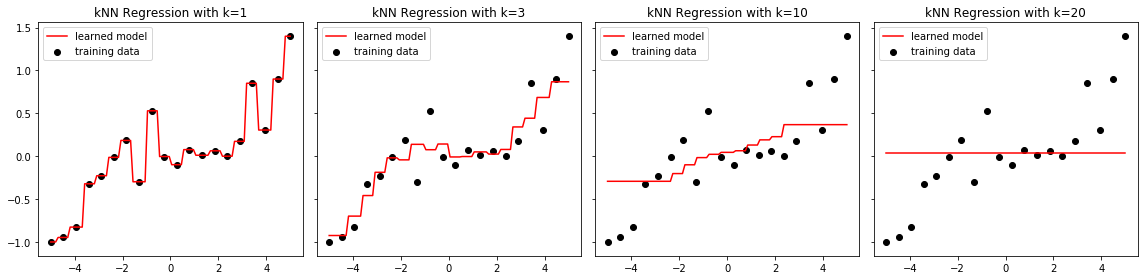

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
#list of numbers of neighbours to try
k_neighbrours = [1, 3, 10, 20]
for i in range(4):
    #instantiate a knn regression model
    knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbrours[i])
    #fit the knn regression model to our training data
    knn_regressor.fit(x_train.reshape((-1, 1)), y_train)
    #use the trained model to predict labels
    y_pred = knn_regressor.predict(x_test.reshape((-1, 1)))
    #plot the training data
    ax[i].scatter(x_train, y_train, color='black', label='training data')
    #plot the prections
    ax[i].plot(x_test, y_pred, color='red', label='learned model')
    
    ax[i].set_title('kNN Regression with k={}'.format(k_neighbrours[i]))
    ax[i].legend(loc='best')
plt.tight_layout()
plt.show()

In [4]:
# Let's write down our own predict_knn_regression implementation instead
def predict_knn_regression(x_test, x_train, y_train, k=1):
    '''
    Function to predict output y for input x given past data (x_train, y_train) in 1-dimension
    '''
    def compute_square_error(x_obs,x_new): return (x_obs - x_new)**2
    N_train = x_train.shape[0]
    N_to_predict = x_test.shape[0]
    y_pred = np.zeros(N_to_predict)
    for n in range(N_to_predict):
        # compute vector of distances (N_train,) array
        distance_vector = np.array([compute_square_error(x_train_indiv,x_test[n]) for x_train_indiv in x_train])
        # find neighbors (points closest to location x_test[n])
        sorted_distances,idxs = [np.array(x) for x in zip( *sorted(zip(distance_vector,range(N_train))) )]
        neighbor_idxs = idxs[:k]
        y_pred[n] = np.mean(y_train[neighbor_idxs[:k]])
    return y_pred

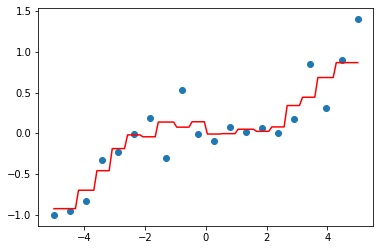

In [5]:
# make predictions given (x_train,y_train) using our own implementation of kNN-Regression!
y_pred = predict_knn_regression(x_test,x_train,y_train,k=3)

# PLOT predicted function (x,y) by KNN regressor
f,ax = plt.subplots()
ax.scatter(x_train,y_train)
ax.plot(x_test,y_pred,'r')

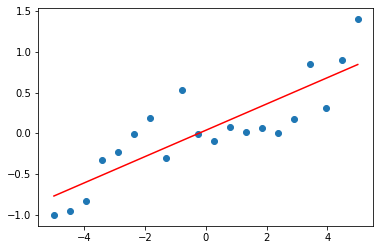

In [6]:
# Linear Regression implementation using sklearn library
# 1. Instantiate linear regression object
linear_regressor = LinearRegression()
x_train.shape
# 2. Fit model given data
linear_regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
# 3. Make prediction
y_pred = linear_regressor.predict(x_test.reshape(-1,1))

f,ax = plt.subplots()
ax.scatter(x_train,y_train)
ax.plot(x_test,y_pred,'r')

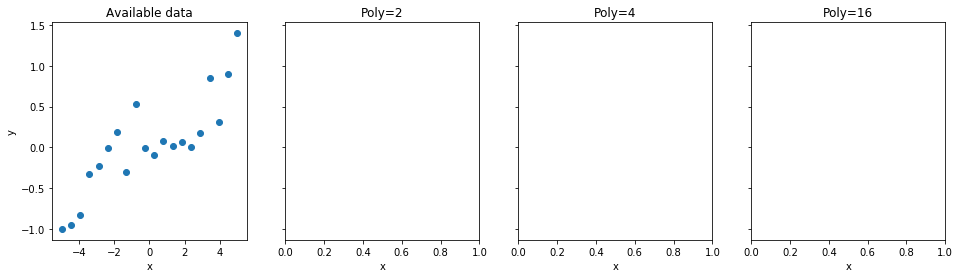

In [7]:
# QUESTION: Fit Polynomial regressors with degrees equal to 2, 4, and 12
fig, ax = plot_toy_data(x_train,y_train)
## WRITE
poly_vec = np.array([2,4,12])
for ax_id, p in enumerate(poly_vec):
    continue
    # Instantiate PolynomialFeatures object and transform data:
    # x_transform_train = phi(x_train)
    # x_transform_test = phi(x_test)
    #
    ## COMPLETE
    #
    # Instantiate LinearRegression object, fit model, and make predictions
    #
    ## COMPLETE
    # Finally, plot scatter plot (just remove comments below)
    # ax[ax_id+1].scatter(x_train,y_train)
    # ax[ax_id+1].plot(x_test,y_pred,'r')

**Question:** Which function is the most appropriate for the data? Why?

**Question:** When the data is high dimensional (many features), how can we tell which choice of degree is best?

# Variance Reduction

In [8]:
def make_data(number_of_train_points, f):
    '''
    This function randomly samples training data in [-5, 5], given a function f.
    
    number_of_train_points: number of training points to sample
    f: the underlying function relating x and y
    '''
    #randomly sample training inputs from [-5, 5]
    x_train = np.random.uniform(-5, 5, number_of_train_points)
    #sort the randomly sampled training inputs
    x_train = np.sort(x_train)
    #generate noisy training labels for the sampled training inputs
    y_train = f(x_train) + np.random.normal(0, 0.5, number_of_train_points)
    return x_train, y_train

def fit_polynomial_regression(x_train, y_train, x_test, polynomial_features, regression):
    '''
    This function implements polynomial regression, given training and testing data as well as
    a polynomial feature model and a linear regression model.
    
    x_train: training inputs
    y_train: training labels
    x_test: tests inputs
    polynomial_features: model for transforming inputs into polynomial features
    regression: linear regression model
    '''
    #tranform training inputs into polynomial features
    poly_x_train = polynomial_features.fit_transform(x_train.reshape((-1, 1)))
    #tranform testing inputs into polynomial features
    poly_x_test = polynomial_features.transform(x_test.reshape((-1, 1)))
    #fit linear regression on top of polynomial features
    regression.fit(poly_x_train, y_train)
    #predict labels for test input
    y_predict = regression.predict(poly_x_test)
    return y_predict

Let's generate some very noisy data using a simple cubic function $f(x) = 0.01 x^3$.

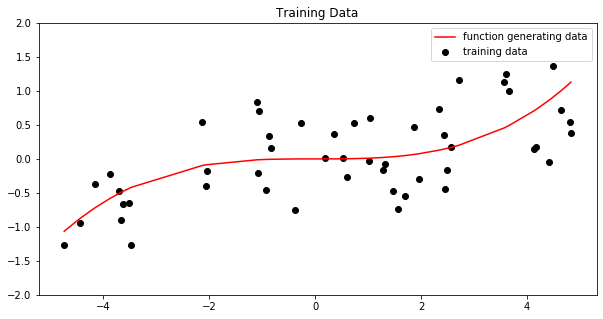

In [9]:
#number of training inputs
number_of_train_points = 50
#number of testing inputs
number_of_test_points = 100
#function generating our data
f = lambda x: 0.01 * x**3
#make training data
x_train, y_train = make_data(number_of_train_points, f)
#make test input that is evenly spaced over [-5, 5]
x_test = np.linspace(-5, 5, number_of_test_points)

#visualize training data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#plot training data
ax.scatter(x_train, y_train, color='black', label='training data')
#plot the underlying function generating the data
ax.plot(x_train, f(x_train), color='red', label='function generating data')
ax.set_title('Training Data')
ax.set_ylim([-2, 2])
plt.legend(loc='best')
plt.show()

Now, let's fit a degree 20 polynomial to our training data. Since this model is so flexible, it can use its extra degree of freedom to capture the noise in the data. As a result, when the training data changes slightly (when we resample the training data), the fitted polynomial will look drastically different. I.e. this model has high variance.

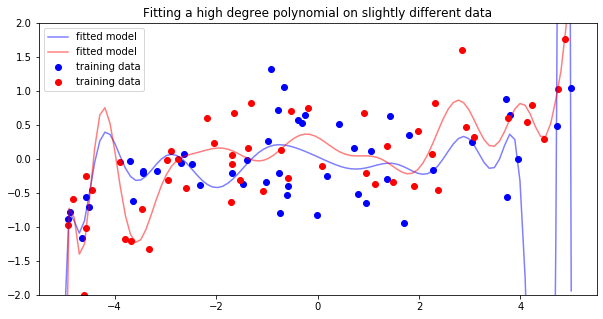

In [10]:
#instantiate a polynomial feature model for a degree 20 polynomial
polynomial_features = PolynomialFeatures(20)
#instantiate a linear regression model
regression = LinearRegression()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
colors = ['blue', 'red']

for i in range(2):
    #resample training data
    x_train, y_train = make_data(number_of_train_points, f)
    #fit our polynomial model on the resampled data
    y_predict = fit_polynomial_regression(x_train, y_train, x_test, polynomial_features, regression)
    #plot the resampled training data
    ax.scatter(x_train, y_train, color=colors[i], label='training data')
    #plot the fitted polynomial model
    ax.plot(x_test, y_predict, color=colors[i], alpha=0.5, label='fitted model')
    
ax.set_title('Fitting a high degree polynomial on slightly different data')
ax.set_ylim([-2, 2])
plt.legend(loc='best')
plt.show()

### Exercise: Regularization
In the following we will implement Ridge and Lasso regression and observe the effect of regularization on variance reduction.

In [11]:
###
# FILL THIS IN
# Repeat the above experiemnt (fit a degree 20 polynomial on different samples of training data) using Ridge
# regression and Lasso regression
###

What is the effect of regularization on this model's variance?

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.145507e-27
  overwrite_a=True).T
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.419254e-27
  overwrite_a=True).T


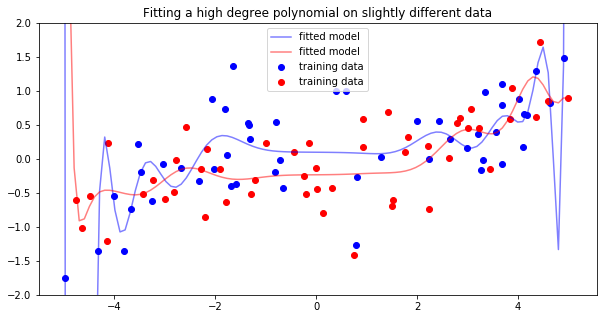

In [12]:
### SOLUTION

#instantiate a polynomial feature model for a degree 20 polynomial
polynomial_features = PolynomialFeatures(20)
#instantiate a linear regression model
ridge_regression = Ridge(alpha=100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
colors = ['blue', 'red']

for i in range(2):
    #resample training data
    x_train, y_train = make_data(number_of_train_points, f)
    #fit our polynomial model on the resampled data
    y_predict = fit_polynomial_regression(x_train, y_train, x_test, polynomial_features, ridge_regression)
    #plot the resampled training data
    ax.scatter(x_train, y_train, color=colors[i], label='training data')
    #plot the fitted polynomial model
    ax.plot(x_test, y_predict, color=colors[i], alpha=0.5, label='fitted model')
    
ax.set_title('Fitting a high degree polynomial on slightly different data')
ax.set_ylim([-2, 2])
plt.legend(loc='best')
plt.show()

### Exercise: Bagging
In the following we will implement bagging:
1. we will train a large ensemble of complex models on bootstrap samples of training data
2. we will average the predictions of the models in our ensemble to reduce the variance in the prediction.

Now, let's repeat this $N$ times: that is, resample the training data $N$ times and train a degree polynomial on each resampled training data set (this is our "ensemble" of models). To make predictions on the test set, we average the predictions of all the models in our ensemble.

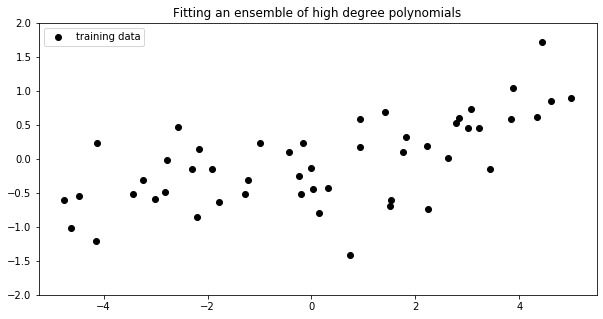

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#plot a set of training data
ax.scatter(x_train, y_train, color='black', label='training data')

###
# FILL THIS IN
# train N number of degree polynomial models on N resampled training data set
# plot the predictions of each model you train on the test inputs
# average their predctions and plot the average
###

ax.set_title('Fitting an ensemble of high degree polynomials')
ax.set_ylim([-2, 2])
plt.legend(loc='best')
plt.show()

What do you notice about each of the models in your ensemble? What do you notice about their average?

In the `make_data` function, we resampled new training inputs from the interval $[-5, 5]$. When we do not have access to new data (e.g. collecting new data is prohibitively expensive), we need to create "new data" from our existing data. To do this, we bootstrap, that is, we sample different subsets from our existing data.

In the following, adapt the `make_data` function to bootstrap sample from an existing set of training inputs, `x_train`, and create your ensemble using these bootstrap samples.

In [14]:
def make_data(number_of_train_points, x, y):
    '''
    This function randomly samples training data from existing data x and y.
    
    number_of_train_points: number of training points to sample
    number_of_test_points: number of testing points to sample
    x: array of existing inputs
    y: array of existing labels 
    f: the underlying function relating x and y
    '''
    #randomly sample training data from x and y
    ###
    # FILL THIS IN
    ###
    return x_train, y_train

x = np.random.uniform(-5, 5, number_of_train_points)
y = f(x) + np.random.normal(0, 0.5, number_of_train_points)

What is the difference between building your ensemble from training data resampled from $[-5, 5]$ and training data bootstraped samples from an existing data set $x, y$? Is this what you expect?

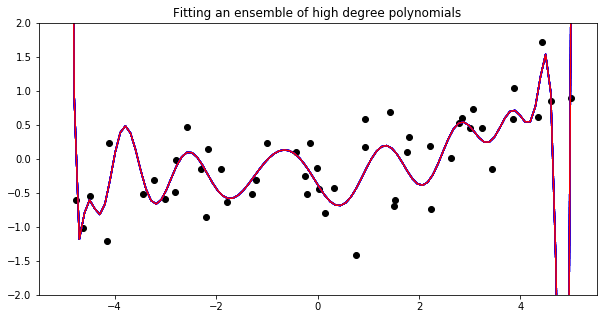

In [15]:
### SOLUTION
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train, y_train, color='black')

y_average_predict = 0
ensemble_size = 100
for i in range(ensemble_size):
    #resample training data
    x_train, y_train = make_data(number_of_train_points, number_of_test_points, f)
    #fit our polynomial model on the resampled data
    y_predict = fit_polynomial_regression(x_train, y_train, x_test, polynomial_features, regression)
    #add the prediction of the new model to the predictions of the previous models
    y_average_predict += y_predict
    #plot the function learned for the resampled training data
    ax.plot(x_test, y_predict, color='blue', alpha=0.1)

#average the predictions of the models
y_average_predict /= ensemble_size * 1.

#plot the averaged model
ax.plot(x_test, y_average_predict, color='red')
ax.set_title('Fitting an ensemble of high degree polynomials')
ax.set_ylim([-2, 2])
plt.show()

# Probabilistic Model of Regression

### Exercise: Probabilistic Model of Linear Regression
Yesterday, we saw that we can view the label $y$ as the noisy observation of an function $f(x)$. That is,
$$
y = f(x) + \epsilon,\; \epsilon \sim \mathcal{N}(0, \sigma^2)
$$
$\epsilon$ represents the output noise and is a normally distributed random variable. We claimed that $y$ is then a random variable distributed as $y\sim \mathcal{N}(f(x), \sigma^2)$.

In this exercise, fix $x=2$, let $f(x) = x + 2$ and $\epsilon \sim \mathcal{N}(0, 1)$. Sample $N$ number of $\epsilon$'s and show that $y$ is a normally distributed random variable by plotting values of $y$ in a histogram. What is the mean and variance of the random variable $y$?

In [16]:
###
# FILL THIS IN
# Sample the noise and visualize the variation of the prediction caused by the variation of the noise
# Hint: plot a histogram of the y's
###

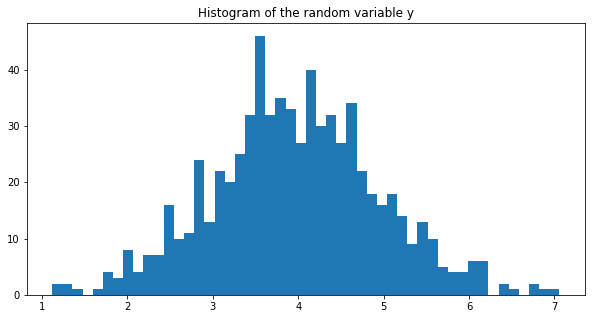

In [17]:
### SOLUTION
N = 700
x = 2
epsilons = np.random.normal(0, 1, N)
y = x + 2 + epsilons

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(y, bins=50)
ax.set_title('Histogram of the random variable y')
plt.show()

### Exercise: Interpreting the likelihood function

Say we're considering two linear models for the dataset $\{(1, 2), (2, 3)\}$ with iid noise $\epsilon_n \sim \mathcal{N}(0, 1)$.

1. Model 1: $y = x + 2$
2. Model 2: $y = -2x + 2$

Which model, assuming one is correct, is more appropriate for the data?

In [18]:
from scipy.stats import norm
#data
x_train = np.array([1, 2])
y_train = np.array([2, 3])

#likelihood functions
lkhd = lambda m, b: norm(m * x_train[0] + b, 1).pdf(y_train[0]) * norm(m * x_train[1] + b, 1).pdf(y_train[1])
print('likelihood of data under model 1:', np.round(lkhd(1, 2), 7))
print('likelihood of data under model 2:', np.round(lkhd(-2, 2), 7))

likelihood of data under model 1: 0.0585498
likelihood of data under model 2: 1e-07


# Bayesian Model of Regression

In [19]:
#instantiate a polynomial feature model for a degree 20 polynomial
polynomial_features = PolynomialFeatures(20)
#number of training inputs
number_of_train_points = 50
#number of testing inputs
number_of_test_points = 100
#function generating our data
f = lambda x: 0.01 * x**3
#make test input that is evenly spaced over [-5, 5]
x_test = np.linspace(-5, 5, number_of_test_points)


#sample training input
x_train = np.random.uniform(-5, 5, number_of_train_points)
#compute noisy label
y_train = f(x_train) + np.random.normal(0, 0.5, number_of_train_points)
#tranform training inputs into polynomial features
poly_x_train = polynomial_features.fit_transform(x_train.reshape((-1, 1)))
#tranform testing inputs into polynomial features
poly_x_test = polynomial_features.transform(x_test.reshape((-1, 1)))
    
#dimension of the weight vector is the number of polynomial features plus the bias
number_of_weights = 20 + 1

#defining a normal prior on weights
sigma = 10.
prior_mean = np.zeros(number_of_weights)
prior_variance = sigma * np.eye(number_of_weights)

#the posterior over weights is a normal distribution
#posterior variance
posterior_variance = np.linalg.inv(1. / sigma * np.eye(number_of_weights) + poly_x_train.T.dot(poly_x_train)) 
#posterior mean
posterior_mean = posterior_variance.dot(poly_x_train.T.dot(y_train.reshape((-1, 1))) * 1. / sigma)

### Exercise: Visualizing the posterior

What is the point of computing the posterior distribution $p(w| x, y)$ over weights rather than a point estimate of the 'best weight vector' for the data? Since we have a distribution for $w$, we can sample some weight vectors, each sample represents a different model for the data. In the following, visualize the functions from the posterior distribution.

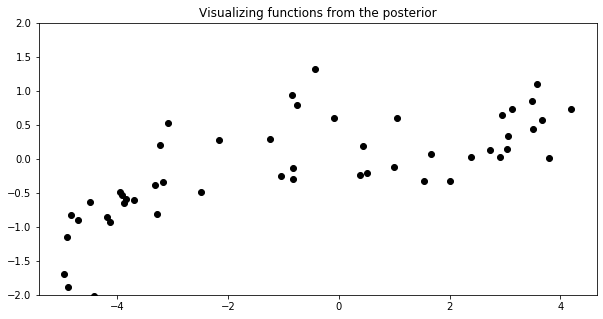

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#plot the training data
ax.scatter(x_train, y_train, color='black')
#number of samples from the posterior
number_of_samples = 100

###
# FILL THIS IN
# sample 100 w's from the posterior, visualize each w as a function over the test inputs
###

ax.set_title('Visualizing functions from the posterior')
ax.set_ylim([-2, 2])
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


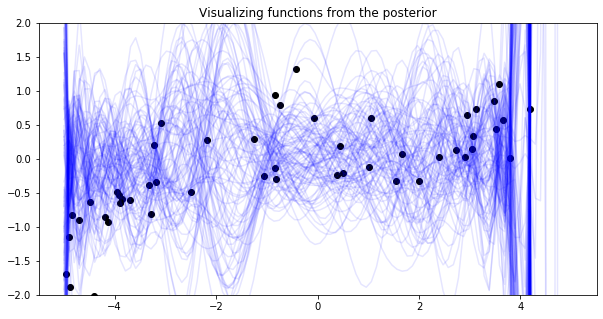

In [21]:
### SOLUTION
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#plot the training data
ax.scatter(x_train, y_train, color='black')
#number of samples from the posterior
number_of_samples = 100

for i in range(number_of_samples):
    #sample a set of parameters from the posterior
    w = np.random.multivariate_normal(posterior_mean.flatten(), posterior_variance, 1)
    #predict using this sampled parameter
    y_pred = w.dot(poly_x_test.T)
    #plot the function represented by this sampled parameter
    ax.plot(x_test, y_pred.flatten(), color='blue', alpha=0.1)

ax.set_title('Visualizing functions from the posterior')
ax.set_ylim([-2, 2])
plt.show()

What do you notice about the numerical issues involving computing the posterior variance analytically? What can we do to address these issues?

Change the prior for $w$ (vary the value for `sigma`), how does your choice of prior effect the posterior over $w$? Can you explain this effect?

Change the number of training data that you sample, how does the number of training data points effect the posterior over $w$? Can you explain this effect?


### Exercise: Visualize the Posterior Predictive
For each test input $x$, each $w$ sampled from the posterior will make a different prediction of the output $y$, thus, the posterior distribution of $w$ induces a distribution over predictions for test input $x$, this is the posterior predictive $p(y|x)$.

In the following, use samples from the posterior over $w$ to generate the posterior predictive distribution for a given input (say $x=2.5$). Visualize the posterior predictive distribution.

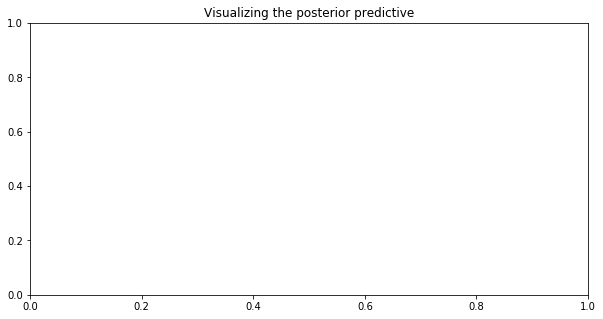

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#number of samples from the posterior
number_of_samples = 500
#our test input
x_test = np.array([2.5])
#our test input transformed into polynomial features
poly_x_test = polynomial_features.fit_transform(x_test.reshape((-1, 1)))

###
# FILL THIS IN
# sample 500 w's from the posterior, use them to simulate the posterior predictive p(y|x) for x=2.5
# visualize the posterior predictive as a histogram
###

ax.set_title('Visualizing the posterior predictive')
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


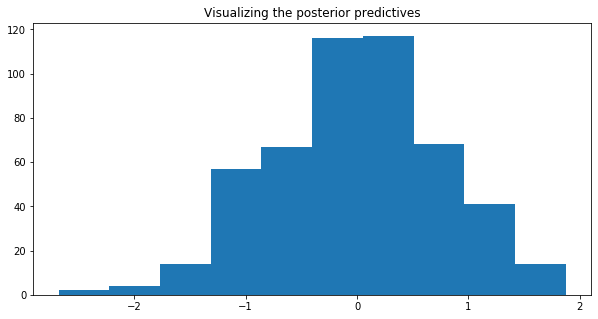

In [23]:
### SOLUTION
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#number of samples from the posterior predictive
number_of_samples = 500
#our test point
x_test = np.array([2.5])
#tranform our test point into polynomial features
poly_x_test = polynomial_features.fit_transform(x_test.reshape((-1, 1)))
y_pred = []

for i in range(number_of_samples):
    #sample a parameter from the posterior
    w = np.random.multivariate_normal(posterior_mean.flatten(), posterior_variance, 1)
    #make a prediction on the test point using the sampled parameter
    y_pred.append(w.dot(poly_x_test[0].T))
#plot a histogram of the predicted values
ax.hist(np.array(y_pred), bins=10)

ax.set_title('Visualizing the posterior predictives')
plt.show()

Based on the posterior predictive distribution, what can you say about the predicted label for the input?

Can you list the pros and cons of computing point estimates for the model parameters and computing posterior distributions over parameters?